<a href="https://colab.research.google.com/github/Sree-Nath-052/ML-Projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

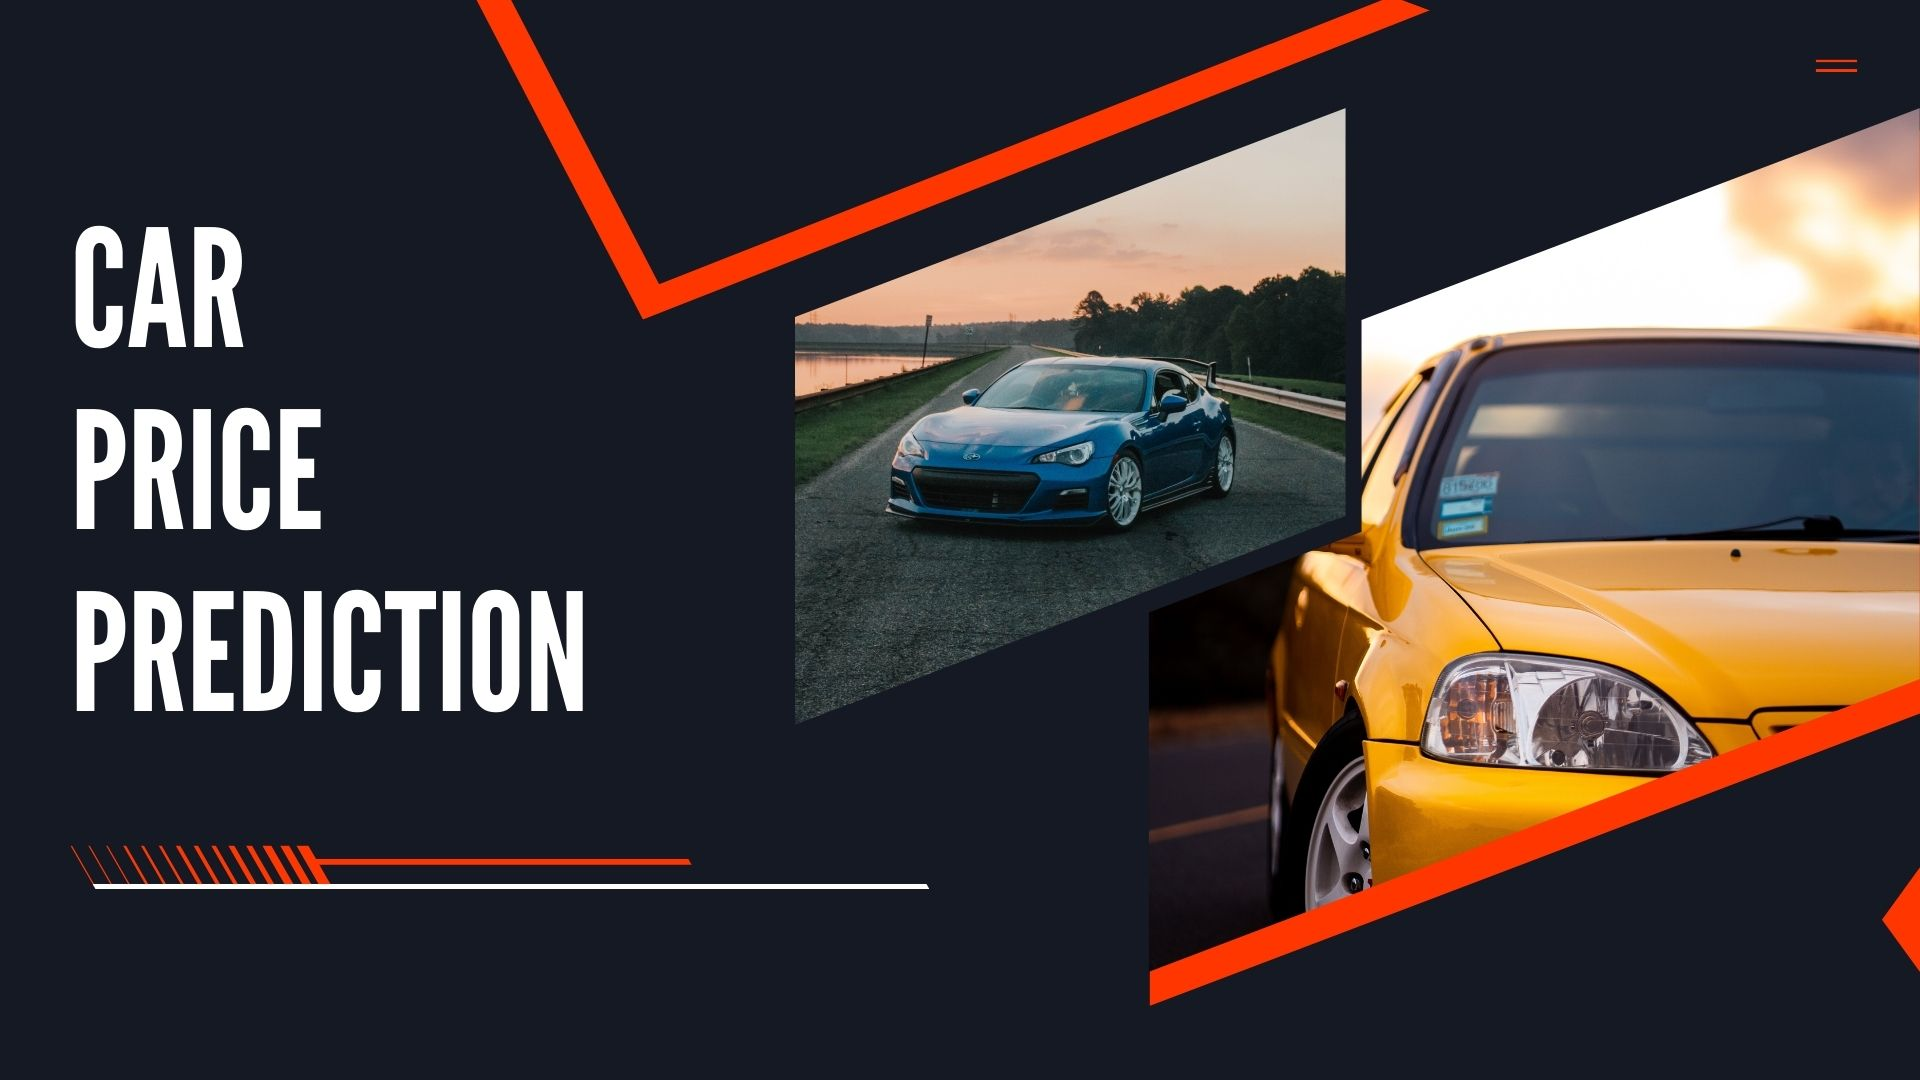

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename='/content/Car_price_image.jpg',height=600,width=1350))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the training data
df=pd.read_csv('/content/train-data.csv')
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [ ]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [ ]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
df.shape

(6019, 14)

In [ ]:
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [ ]:
df['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998])

In [ ]:
df['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [ ]:
df['Name'].value_counts()

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: count, Length: 1878, dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

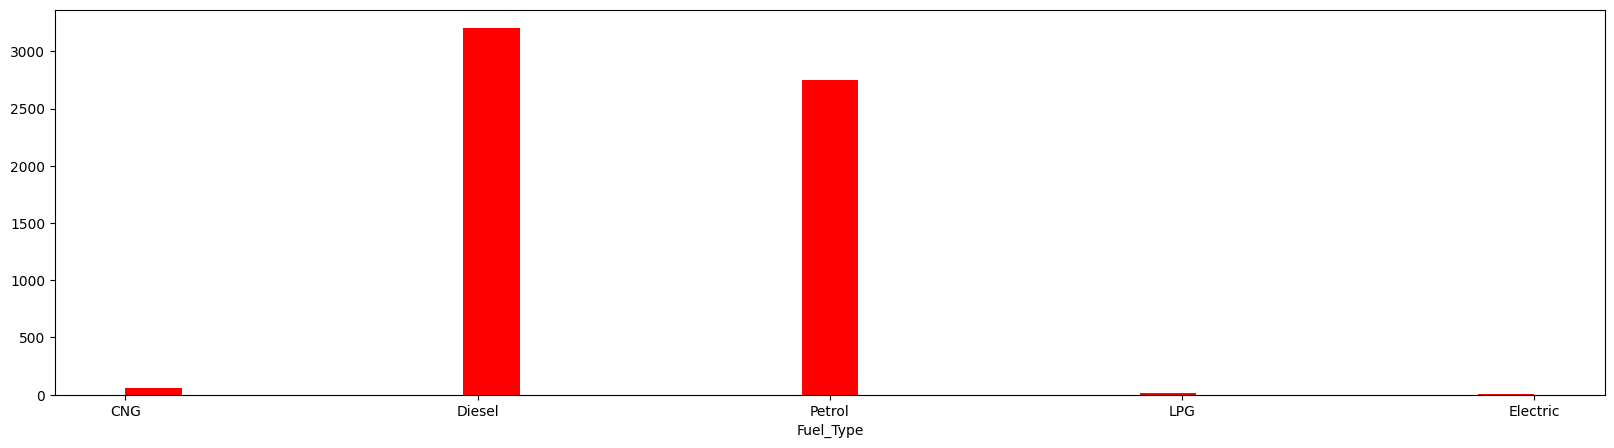

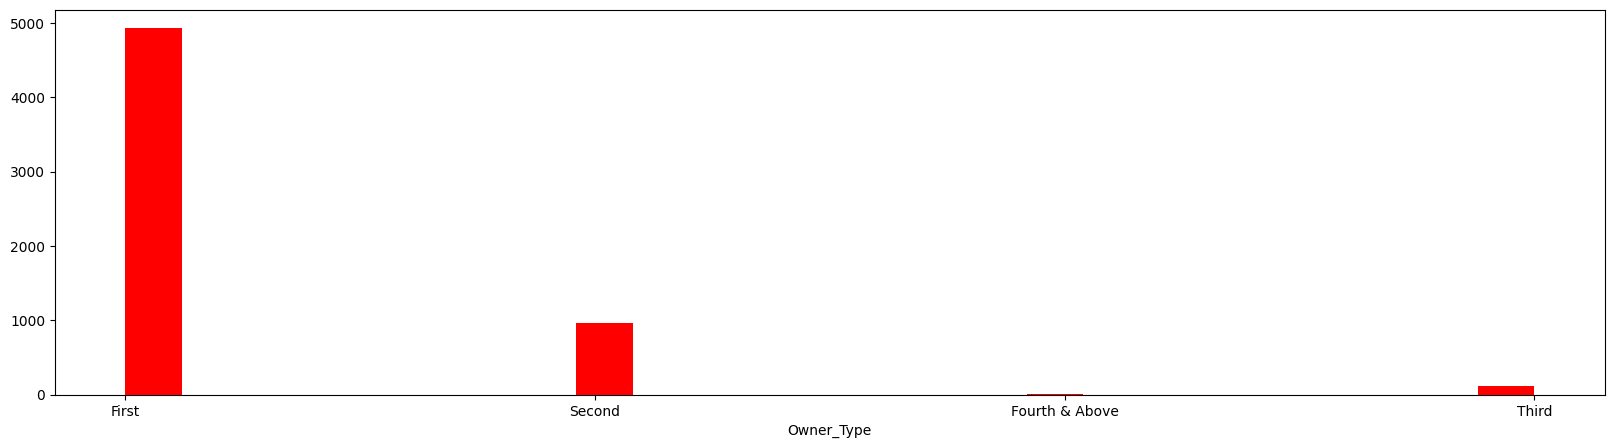

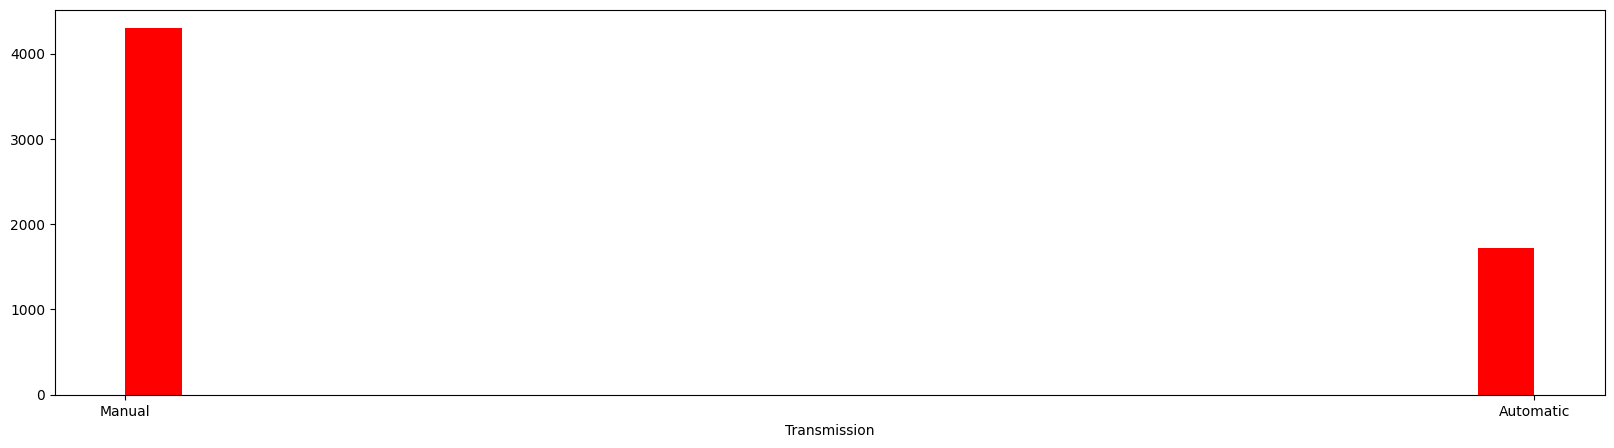

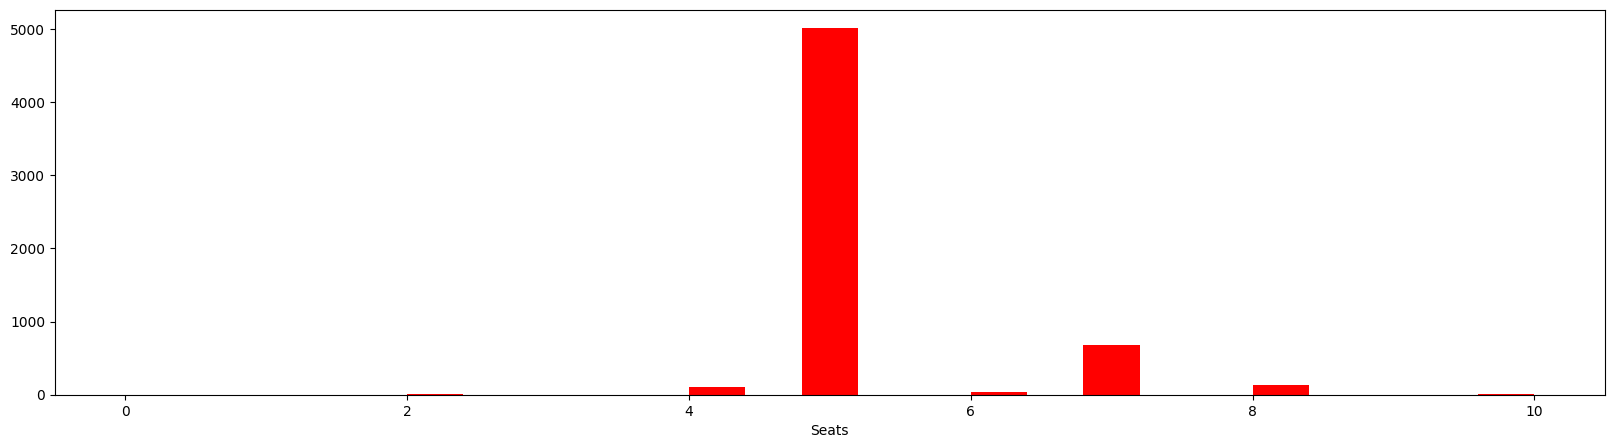

In [ ]:
#Visualization
cols=['Fuel_Type','Owner_Type','Transmission','Seats']
for i in cols:
  plt.figure(figsize=(20,5))
  plt.hist(df[i],bins=25,color='r')
  plt.xlabel(i)

([<matplotlib.patches.Wedge at 0x7dbcf06a6fb0>,
 [Text(1.0078053165267538, 0.44082700005831044, 'Mumbai'),
  Text(0.3863049686776622, 1.029936149076704, 'Pune'),
  Text(-0.395964052150537, 1.0262614040314129, 'Chennai'),
  Text(-0.9486320080448242, 0.556863819360573, 'Coimbatore'),
  Text(-1.0913088923682102, -0.1380032660413169, 'Hyderabad'),
  Text(-0.8126139601607201, -0.7413896086079923, 'Jaipur'),
  Text(-0.28576376069270243, -1.0622330596788843, 'Kochi'),
  Text(0.29794204540845104, -1.0588817391842342, 'Kolkata'),
  Text(0.7479394417815232, -0.8065894813519103, 'Delhi'),
  Text(1.0040888015600204, -0.44922786932887654, 'Bangalore'),
  Text(1.0924904286225072, -0.12831470441149895, 'Ahmedabad')],
 [Text(0.5497119908327748, 0.24045109094089656, '13.1%'),
  Text(0.21071180109690663, 0.5617833540418384, '12.3%'),
  Text(-0.21598039208211106, 0.5597789476534979, '10.8%'),
  Text(-0.5174356407517222, 0.30374390146940344, '10.6%'),
  Text(-0.5952593958372054, -0.0752745087498092, '10.3

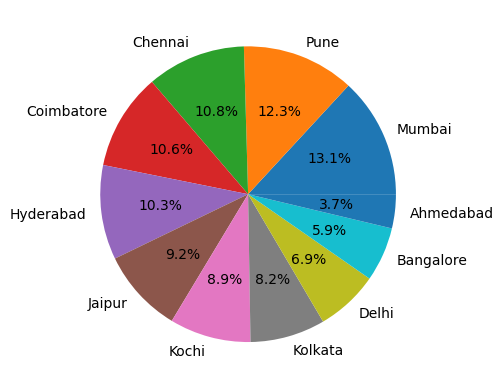

In [ ]:
plt.pie(df['Location'].value_counts(),labels=df['Location'].unique(),autopct='%1.1f%%')

In [ ]:
#Collecting only the brand names from the name field
df['Brand']=df['Name'].apply(lambda x:x.split()[0])
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,Maruti
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,Hyundai
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,Mahindra
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,Maruti


In [ ]:
df['Brand'].value_counts()

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price', 'Brand'],
      dtype='object')

In [ ]:
#Get dummies encoding
df1=pd.get_dummies(df[['Location','Transmission','Owner_Type','Brand','Fuel_Type']],dtype=int,drop_first=True)
df1

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6016,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6017,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfe=pd.concat([df,df1],axis=1)
dfe

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,0,0,0,0,0,0,0,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,0,0,0,0,0,0,1,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,0,0,0,0,0,0,0,0,0,1
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,0,0,0,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,...,0,0,0,0,0,0,1,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,...,0,0,0,0,0,0,1,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,...,0,0,0,0,0,0,1,0,0,0
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfe.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price', 'Brand', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Brand_Audi', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Force',
       'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU',
       'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini',
       'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz',
       'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Porsche',
       'Brand_Renault', 'Brand_Skoda', 'Brand_Smart', 'Brand_Tata',
 

In [ ]:
#Dropping the unwanted columns
dfe.drop(['Unnamed: 0','Name','Location','Fuel_Type','Transmission','Owner_Type','New_Price','Brand'],axis=1,inplace=True)
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6015,2015,100000,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6016,2012,55000,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6017,2013,46000,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfe.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Price                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
Brand_Audi                     int64
Brand_BMW                      int64
Brand_Bentley                  int64
Brand_Chevrolet                int64
Brand_Datsun                   int64
Brand_Fiat                     int64
B

In [ ]:
#Removing the units to collect only the numerical datas
dfe['Mileage']=dfe['Mileage'].str.replace('km/kg','')
dfe['Mileage']=dfe['Mileage'].str.replace('kmpl','')
dfe['Engine']=dfe['Engine'].str.replace('CC','')
dfe['Power']=dfe['Power'].str.replace('bhp','')
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfe.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Price                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
Brand_Audi                     int64
Brand_BMW                      int64
Brand_Bentley                  int64
Brand_Chevrolet                int64
Brand_Datsun                   int64
Brand_Fiat                     int64
B

In [ ]:
dfe['Power'].unique()

array(['58.16 ', '126.2 ', '88.7 ', '88.76 ', '140.8 ', '55.2 ', '63.1 ',
       '171.5 ', '103.6 ', '74 ', '103.25 ', '116.3 ', '187.7 ', '115 ',
       '175.56 ', '98.6 ', '83.8 ', '167.62 ', '190 ', '88.5 ', '177.01 ',
       '80 ', '67.1 ', '102 ', '108.45 ', '138.1 ', '184 ', '179.5 ',
       '103.5 ', '64 ', '82 ', '254.8 ', '73.9 ', '46.3 ', '37.5 ', '77 ',
       '82.9 ', '149.92 ', '138.03 ', '112.2 ', '163.7 ', '71 ', '105 ',
       '174.33 ', '75 ', '103.2 ', '53.3 ', '78.9 ', '147.6 ', '147.8 ',
       '68 ', '186 ', '170 ', '69 ', '140 ', '78 ', '194 ', '500 ',
       '108.5 ', '86.8 ', '187.74 ', 'null ', '132 ', '86.7 ', '73.94 ',
       '117.3 ', '218 ', '168.5 ', '89.84 ', '110 ', '90 ', '82.85 ',
       '67 ', '241.4 ', '35 ', '270.9 ', '126.32 ', '73 ', '130 ',
       '100.6 ', '150 ', '75.94 ', '215 ', '107.3 ', '37.48 ', '120 ',
       '178 ', '152 ', '91.1 ', '85.80 ', '362.07 ', '121.3 ', '143 ',
       '81.80 ', '171 ', '76.8 ', '103.52 ', '444 ', '362.9 ', '67.

In [ ]:
#Replacing the null field with 0
dfe['Power']=dfe['Power'].str.replace('null','0')
dfe.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Price                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
Brand_Audi                     int64
Brand_BMW                      int64
Brand_Bentley                  int64
Brand_Chevrolet                int64
Brand_Datsun                   int64
Brand_Fiat                     int64
B

In [ ]:
#Data type conversion
dfe['Engine']=dfe['Engine'].astype(float)
dfe['Power']=dfe['Power'].astype(float)
dfe['Mileage']=dfe['Mileage'].astype(float)
dfe.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
Brand_Audi                     int64
Brand_BMW                      int64
Brand_Bentley                  int64
Brand_Chevrolet                int64
Brand_Datsun                   int64
Brand_Fiat                     int64
B

In [ ]:
#Declaring 0 as a missing value
dfe.loc[dfe.Power==0,'Power']=np.NaN
dfe.isna().sum()

Year                           0
Kilometers_Driven              0
Mileage                        2
Engine                        36
Power                        143
Seats                         42
Price                          0
Location_Bangalore             0
Location_Chennai               0
Location_Coimbatore            0
Location_Delhi                 0
Location_Hyderabad             0
Location_Jaipur                0
Location_Kochi                 0
Location_Kolkata               0
Location_Mumbai                0
Location_Pune                  0
Transmission_Manual            0
Owner_Type_Fourth & Above      0
Owner_Type_Second              0
Owner_Type_Third               0
Brand_Audi                     0
Brand_BMW                      0
Brand_Bentley                  0
Brand_Chevrolet                0
Brand_Datsun                   0
Brand_Fiat                     0
Brand_Force                    0
Brand_Ford                     0
Brand_Honda                    0
Brand_Hyun

In [ ]:
#Filling the missing values
dfe['Mileage']=dfe['Mileage'].fillna(dfe['Mileage'].mean())
dfe['Engine']=dfe['Engine'].fillna(dfe['Engine'].mean())
dfe['Power']=dfe['Power'].fillna(dfe['Power'].mean())
dfe['Seats']=dfe['Seats'].fillna(dfe['Seats'].mean())
dfe.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Brand_Audi                   0
Brand_BMW                    0
Brand_Bentley                0
Brand_Chevrolet              0
Brand_Datsun                 0
Brand_Fiat                   0
Brand_Force                  0
Brand_Ford                   0
Brand_Honda                  0
Brand_Hyundai                0
Brand_ISUZU                  0
Brand_Is

In [ ]:
#Seperating x and y
x=dfe.drop(['Price'],axis=1)
x

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6017,2013,46000,18.90,998.0,67.10,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y=df['Price']
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [ ]:
#Importing the testing data
dft=pd.read_csv('/content/test-data.csv')
dft

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [ ]:
dft.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [ ]:
dft.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN
1233,1233,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN


In [ ]:
dft.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price'],
      dtype='object')

In [ ]:
dft.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [ ]:
dft.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object

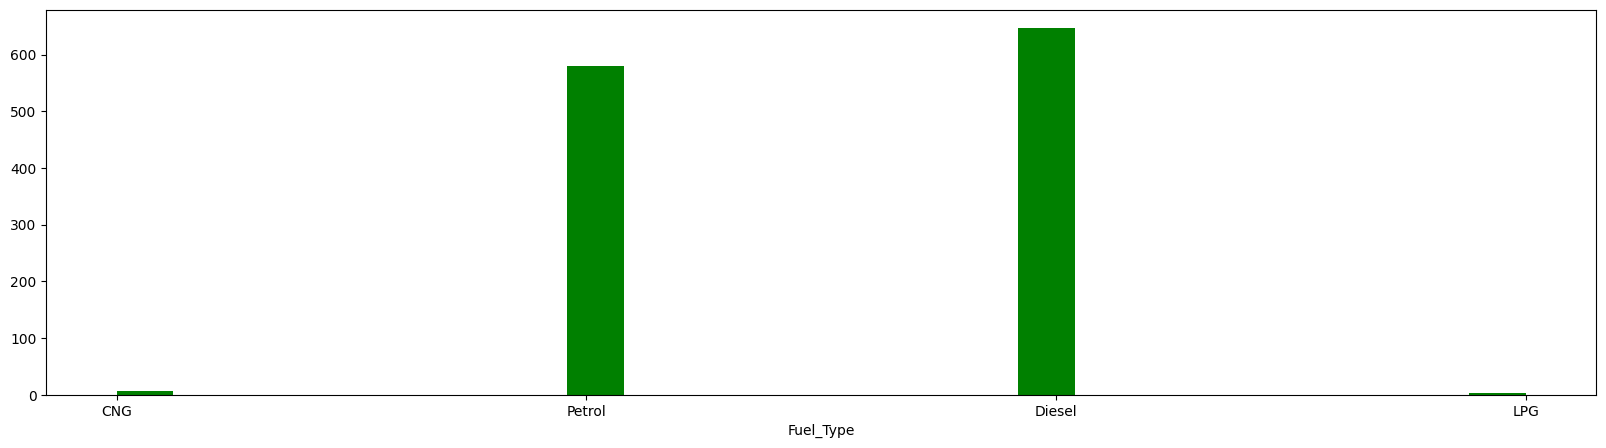

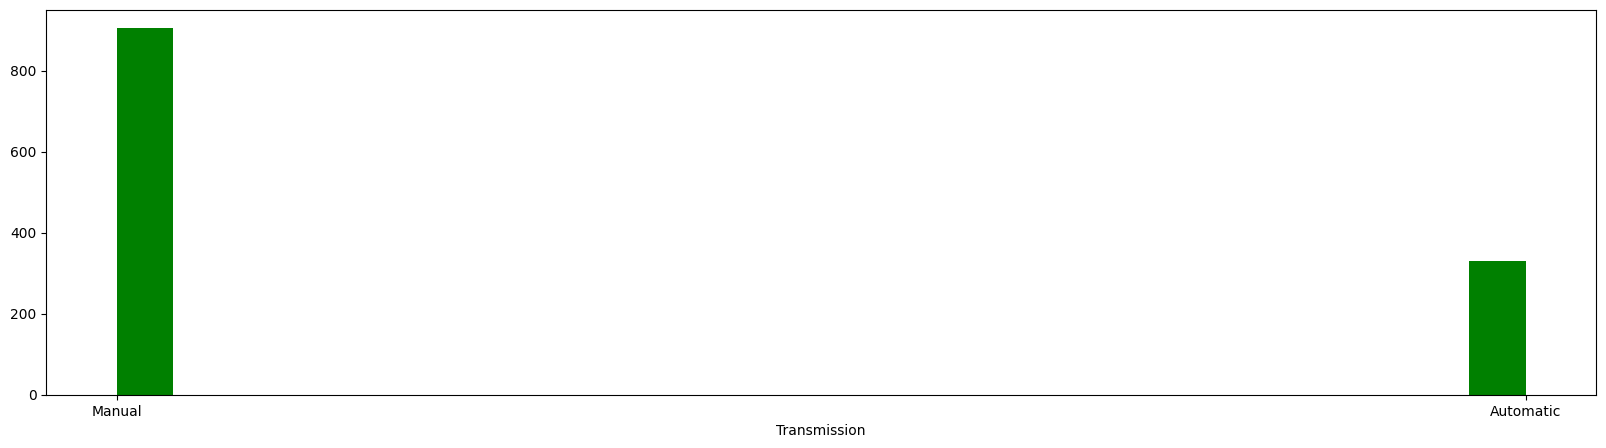

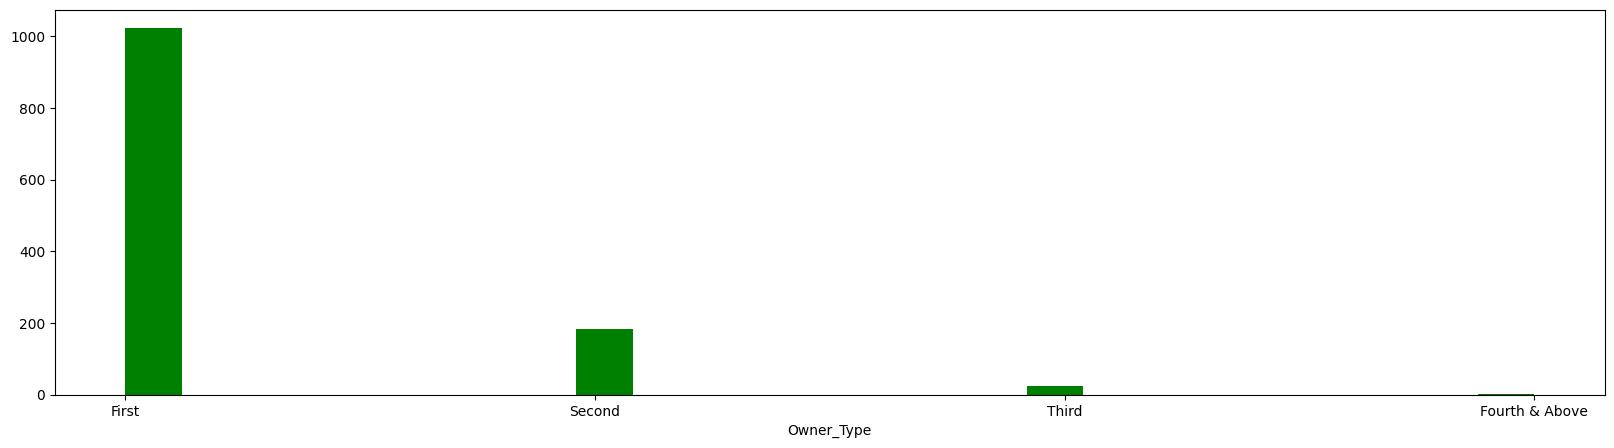

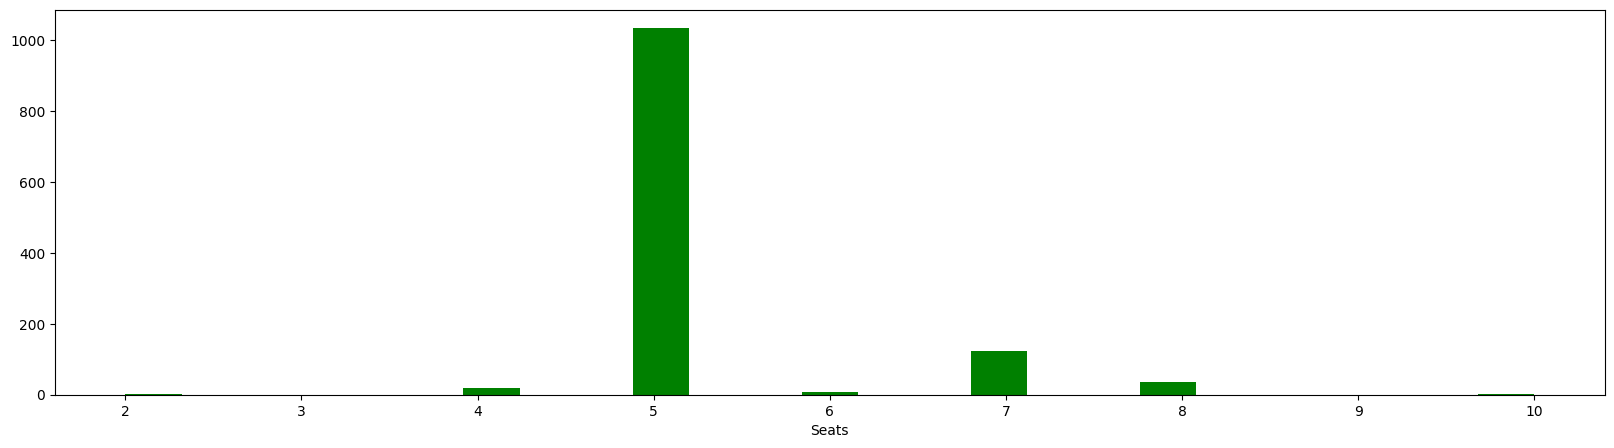

In [ ]:
#Visualization
test_cols=['Fuel_Type','Transmission','Owner_Type','Seats']
for i in test_cols:
  plt.figure(figsize=(20,5))
  plt.hist(dft[i],bins=25,color='g')
  plt.xlabel(i)

<Axes: xlabel='count', ylabel='Location'>

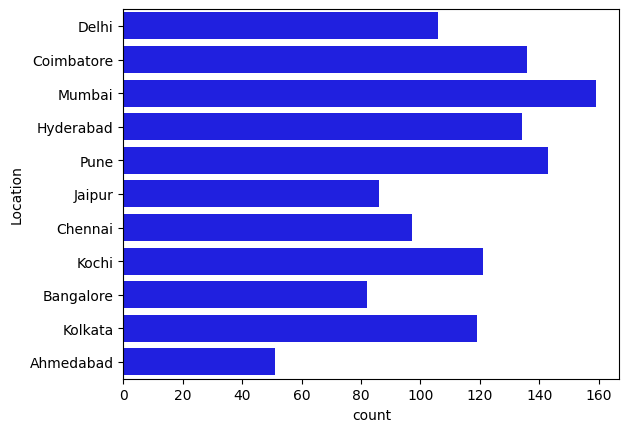

In [ ]:
sns.countplot(y=dft['Location'],color='b')

In [ ]:
#Collecting only the brand names from the name field
dft['Brand']=dft['Name'].apply(lambda x:x.split()[0])
dft['Brand'].value_counts()

Brand
Maruti           233
Hyundai          233
Honda            135
Toyota            96
Mercedes-Benz     62
Mahindra          59
Volkswagen        59
Ford              51
Audi              49
BMW               45
Tata              42
Chevrolet         30
Skoda             29
Nissan            26
Renault           25
Fiat              10
Mitsubishi         9
Jaguar             8
Volvo              7
Land               7
Mini               5
Datsun             4
Jeep               4
Bentley            1
Hindustan          1
Isuzu              1
Porsche            1
ISUZU              1
OpelCorsa          1
Name: count, dtype: int64

In [ ]:
#Get dummies encoding
dft1=pd.get_dummies(dft[['Location','Transmission','Owner_Type','Brand','Fuel_Type']],dtype=int,drop_first=True)
dft1

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1230,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1231,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1232,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
dfte=pd.concat([dft,dft1],axis=1)
dfte

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,...,0,0,0,0,0,0,0,0,0,0
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,...,0,0,0,0,0,0,0,0,0,1
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,...,0,0,0,0,1,0,0,1,0,0
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,...,0,0,0,0,1,0,0,1,0,0
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,...,0,0,0,0,0,1,0,1,0,0
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,...,0,0,0,0,0,1,0,0,0,1
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,...,0,0,0,0,0,0,0,1,0,0
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
dfte.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Brand', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Brand_BMW', 'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun',
       'Brand_Fiat', 'Brand_Ford', 'Brand_Hindustan', 'Brand_Honda',
       'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Isuzu', 'Brand_Jaguar',
       'Brand_Jeep', 'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti',
       'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan',
       'Brand_OpelCorsa', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', '

In [ ]:
#Dropping the unwanted columns
dfte.drop(['Unnamed: 0', 'Name', 'Location','Transmission', 'Owner_Type','New_Price', 'Brand','Fuel_Type'],axis=1,inplace=True)
dfte

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,2014,40929,32.26 km/kg,998 CC,58.2 bhp,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2013,54493,24.7 kmpl,796 CC,47.3 bhp,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2017,34000,13.68 kmpl,2393 CC,147.8 bhp,7.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2012,139000,23.59 kmpl,1364 CC,null bhp,5.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2014,29000,18.5 kmpl,1197 CC,82.85 bhp,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54 kmpl,1598 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1230,2015,59000,17.21 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1231,2012,28000,23.08 kmpl,1461 CC,63.1 bhp,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1232,2013,52262,17.2 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
#Removing the units to collect only the numerical datas
dfte['Mileage']=dfte['Mileage'].str.replace('km/kg','')
dfte['Mileage']=dfte['Mileage'].str.replace('kmpl','')
dfte['Power']=dfte['Power'].str.replace('bhp','')
dfte['Engine']=dfte['Engine'].str.replace('CC','')
dfte

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,2014,40929,32.26,998,58.2,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2013,54493,24.7,796,47.3,5.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2017,34000,13.68,2393,147.8,7.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2012,139000,23.59,1364,null,5.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2014,29000,18.5,1197,82.85,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598,103.6,5.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1230,2015,59000,17.21,1197,103.6,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1231,2012,28000,23.08,1461,63.1,5.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1232,2013,52262,17.2,1197,103.6,5.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
dfte['Power'].unique()

array(['58.2 ', '47.3 ', '147.8 ', 'null ', '82.85 ', '140 ', '168.7 ',
       '55.2 ', '118 ', '167.6 ', '82 ', '125 ', '75 ', '102.5 ', '184 ',
       '68 ', '81.80 ', '85.8 ', '73.94 ', nan, '132 ', '70 ', '46.3 ',
       '98.6 ', '103.52 ', '80 ', '67.06 ', '103.6 ', '68.05 ', '107.2 ',
       '74 ', '121.3 ', '102 ', '190 ', '174.33 ', '88.5 ', '91.1 ',
       '136 ', '100.6 ', '89.84 ', '153.86 ', '174.3 ', '67.04 ', '69 ',
       '78 ', '138.1 ', '81.83 ', '88.8 ', '67 ', '82.5 ', '120 ',
       '108.62 ', '67.1 ', '86.8 ', '93.7 ', '62 ', '84 ', '79.4 ',
       '63.1 ', '100 ', '81.86 ', '175.67 ', '87.2 ', '126.32 ', '103.2 ',
       '179.5 ', '88.76 ', '99.6 ', '120.7 ', '62.1 ', '83.1 ', '180 ',
       '75.94 ', '126.24 ', '35 ', '73.9 ', '138.13 ', '201.15 ', '218 ',
       '57.6 ', '147.51 ', '224 ', '66.1 ', '130.3 ', '177 ', '90 ',
       '123.24 ', '130 ', '148 ', '78.9 ', '108.495 ', '187.7 ', '204 ',
       '165 ', '98.96 ', '117.3 ', '254.8 ', '364.9 ', '108.5 ', '20

In [ ]:
#Replacing the null field with 0
dfte['Power']=dfte['Power'].str.replace('null','0')
dfte.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
Brand_BMW                      int64
Brand_Bentley                  int64
Brand_Chevrolet                int64
Brand_Datsun                   int64
Brand_Fiat                     int64
Brand_Ford                     int64
Brand_Hindustan                int64
B

In [ ]:
#Data type conversion
dfte['Mileage']=dfte['Mileage'].astype(float)
dfte['Engine']=dfte['Engine'].astype(float)
dfte['Power']=dfte['Power'].astype(float)
dfte.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
Brand_BMW                      int64
Brand_Bentley                  int64
Brand_Chevrolet                int64
Brand_Datsun                   int64
Brand_Fiat                     int64
Brand_Ford                     int64
Brand_Hindustan                int64
B

In [ ]:
#Declaring 0 as a missing value
dfte.loc[dfte.Power==0,'Power']=np.NaN
dfte.isna().sum()

Year                          0
Kilometers_Driven             0
Mileage                       0
Engine                       10
Power                        32
Seats                        11
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
Brand_BMW                     0
Brand_Bentley                 0
Brand_Chevrolet               0
Brand_Datsun                  0
Brand_Fiat                    0
Brand_Ford                    0
Brand_Hindustan               0
Brand_Honda                   0
Brand_Hyundai                 0
Brand_ISUZU                   0
Brand_Isuzu                   0
Brand_Ja

In [ ]:
#Filling the missing values
dfte['Engine']=dfte['Engine'].fillna(dfte['Engine'].mean())
dfte['Power']=dfte['Power'].fillna(dfte['Power'].mean())
dfte['Seats']=dfte['Seats'].fillna(dfte['Seats'].mode()[0])
dfte.isna().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Brand_BMW                    0
Brand_Bentley                0
Brand_Chevrolet              0
Brand_Datsun                 0
Brand_Fiat                   0
Brand_Ford                   0
Brand_Hindustan              0
Brand_Honda                  0
Brand_Hyundai                0
Brand_ISUZU                  0
Brand_Isuzu                  0
Brand_Jaguar                 0
Brand_Je

In [ ]:
z=dfte
z.shape

(1234, 51)

In [ ]:
x.shape

(6019, 54)

In [ ]:
#Dropping the unwanted columns to maintain same columns in training and predicting datas
x.drop(['Brand_Audi','Brand_Force','Brand_Lamborghini','Brand_Smart','Fuel_Type_Electric'],axis=1,inplace=True)
z.drop(['Brand_Hindustan','Brand_OpelCorsa'],axis=1,inplace=True)

In [ ]:
x.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol'],
      dtype='object')

In [ ]:
z.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Brand_BMW', 'Brand_Bentley',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Land', 'Brand_Mahindra',
       'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi',
       'Brand_Nissan', 'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol'],
      dtype='object')

In [ ]:
#Model creation and prediction
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
ypred=model.predict(z)
ypred

array([ 2.41326401,  1.21400133, 16.77994415, ..., -0.05367925,
        5.74039   , 24.73737009])